In [2]:
import sys
!{sys.executable} -m pip install patsy
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices

%pylab inline
import re
import string

Populating the interactive namespace from numpy and matplotlib


In [302]:
import sys
!{sys.executable} -m pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\zgh\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [3]:
#comments are coming in as utf-8 so I am using this code to change it back to ascii
def unicodetoascii(text):

    TEXT = (text.
    		replace('\xe2\x80\x99', "'").
            replace('\xc3\xa9', 'e').
            replace('\xe2\x80\x90', '-').
            replace('\xe2\x80\x91', '-').
            replace('\xe2\x80\x92', '-').
            replace('\xe2\x80\x93', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x98', "'").
            replace('\xe2\x80\x9b', "'").
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9d', '"').
            replace('\xe2\x80\x9e', '"').
            replace('\xe2\x80\x9f', '"').
            replace('\xe2\x80\xa6', '...').#
            replace('\xe2\x80\xb2', "'").
            replace('\xe2\x80\xb3', "'").
            replace('\xe2\x80\xb4', "'").
            replace('\xe2\x80\xb5', "'").
            replace('\xe2\x80\xb6', "'").
            replace('\xe2\x80\xb7', "'").
            replace('\xe2\x81\xba', "+").
            replace('\xe2\x81\xbb', "-").
            replace('\xe2\x81\xbc', "=").
            replace('\xe2\x81\xbd', "(").
            replace('\xe2\x81\xbe', ")")

                 )
    return TEXT

In [6]:
data = pd.read_csv('final.csv', sep=',',names=['id', 'date','user','text'])


In [8]:
data.drop(data.index[:1], inplace=True)


In [9]:
data

,id,date,user,text
1,0.0,September 7,dino001,If they keep it around in next four-five years...
2,1.0,September 7,circlew,The lease rate is the factor that stops me col...
3,2.0,September 8,qbrozen,"Yes, the completely noncomparable M2 would bea..."
4,3.0,September 9,FlightNurse2,Why not a Genesis G70 with a manual?
5,4.0,September 9,roadburner,"Again, the local dealer are hopeless at best(W..."
6,5.0,September 9,FlightNurse2,Are you talking about Genesis Dealers or Hyund...
7,6.0,September 9,roadburner,"Thanks, but I am more than aware of the distin..."
8,7.0,September 9,dino001,"Yeah, I went once to an AutoNation Lexus store..."
9,8.0,September 24,benjaminhf,I am the poster formerly known as benjaminh an...
10,9.0,September 24,stickguy,Still on the list. Just have not been looking...


In [10]:
#text field is the comments field
#unicodetoascii changes the form from unicoding to regular english
#making all the comments lower case
#dt = data.iloc[:50]
text = data['text']
text = text.map(lambda a: unicodetoascii(str(a)))
text = text.map(lambda a: a.lower())

#text= text.map(lambda a: str(a).decode('ascii', errors='ignore'))
#text_18 = text.loc[18]

#text_18 = text_18.decode("ascii", errors="ignore")
#text_18
text

1       if they keep it around in next four-five years...
2       the lease rate is the factor that stops me col...
3       yes, the completely noncomparable m2 would bea...
4                    why not a genesis g70 with a manual?
5       again, the local dealer are hopeless at best(w...
6       are you talking about genesis dealers or hyund...
7       thanks, but i am more than aware of the distin...
8       yeah, i went once to an autonation lexus store...
9       i am the poster formerly known as benjaminh an...
10      still on the list.  just have not been looking...
11                                   i sent you a message
12      a new and mostly positive review by kelly blue...
13      if i do manage to upgrade to a tlx it would ha...
14      thanks. i'll give it a try at some point to me...
15      i'm not sure if i'd have the patience and disc...
16      they usually go up as the year goes along. chr...
17      yeah, i was and am a bit concerned with gettin...
18      the kb

In [13]:
models = pd.read_csv('models.csv', sep=',',names=['brand','model'],encoding='cp1252')

In [15]:
#this text is also in unicode so just replacing one of the symbols with a space (we can also call the unicodetoascii function here for more robust cleaning)
#making the model names lowercase
models.model = models['model'].map(lambda x: x.replace('\xa0', ''))
models.model = models['model'].map(lambda x: x.lower())


In [24]:
models

,brand,model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx
5,acura,mdx
6,acura,rdx
7,acura,tsx
8,acura,rsx
9,audi,quattro


In [19]:
#create dictionary {model: brand}
#this will be used when locating when the model is written, and replacing it to the brand name
brand_dict = {}
for i in range(len(models)):
    brand_dict[models['model'][i]] = models['brand'][i]

In [20]:
brand_dict

{'integra': 'acura',
 'legend': 'honda',
 'vigor': 'acura',
 'rlx': 'acura',
 'ilx': 'acura',
 'mdx': 'acura',
 'rdx': 'acura',
 'tsx': 'acura',
 'rsx': 'acura',
 'quattro': 'audi',
 'a4': 'audi',
 'a6': 'audi',
 'a5': 'audi',
 'a7': 'audi',
 'q3': 'audi',
 'q5': 'audi',
 'q7': 'audi',
 'a8': 'audi',
 'a3': 'audi',
 '3-series': 'bmw',
 '5-series': 'bmw',
 '6-series': 'bmw',
 '4-series': 'bmw',
 'xdrive': 'bmw',
 'alpina': 'bmw',
 '330ci': 'bmw',
 '328i': 'bmw',
 '330c': 'bmw',
 '335i': 'bmw',
 '335d': 'bmw',
 '528i': 'bmw',
 '535i': 'bmw',
 '128i': 'bmw',
 '640i': 'bmw',
 '3er': 'bmw',
 '5er': 'bmw',
 'm5': 'bmw',
 'm3': 'bmw',
 'm6': 'bmw',
 'bmws': 'bmw',
 'bmwesque': 'bmw',
 'park avenue': 'buick',
 'la crosse': 'buick',
 'lacrosse': 'buick',
 'century': 'toyota',
 'enclave': 'buick',
 'encore': 'buick',
 'regal': 'buick',
 'buicks': 'buick',
 'escalade': 'cadillac',
 'srx': 'cadillac',
 'xts': 'cadillac',
 'cars': 'car',
 'grand blazer': 'chevrolet',
 'trailblazer': 'chevrolet',
 '

In [28]:
#replace all models with brand names


#for key in brand_dict.iterkeys():
 #   dt['text'] = dt['text'].map(lambda x: x.replace(key, brand_dict[key]))
    
#dt['text']
#for key in brand_dict.iterkeys():
#    text_18 = text_18.replace(key, brand_dict[key])
#text_18

def replace(match):
    return brand_dict[match.group(0)]

text = text.map(lambda x: re.sub('|'.join(r'\b%s' % re.escape(s) for s in brand_dict), 
        replace, x) )

#text_18 =  re.sub('|'.join(r'\b%s' % re.escape(s) for s in brand_dict), 
#        replace, text_18) 
text

1       if they keep it around in next four-five years...
2       the lease rate is the factor that stops me col...
3       yes, the completely noncomparable m2 would bea...
4                    why not a hyundai g70 with a manual?
5       again, the local dealer are hopeless at best(w...
6       are you talking about hyundai dealers or hyund...
7       thanks, but i am more than aware of the distin...
8       yeah, i went once to an autonation lexus store...
9       i am the poster formerly known as benjaminh an...
10      still on the list.  just have not been looking...
11                                   i sent you a message
12      a new and mostly positive review by kelly blue...
13      if i do manage to upgrade to a tlx it would ha...
14      thanks. i'll give it a try at some point to me...
15      i'm not sure if i'd have the patience and disc...
16      they usually go up as the year goes along. chr...
17      yeah, i was and am a bit concerned with gettin...
18      the kb

In [26]:
#finding all of the unique/different brand names
brand = list(set(models.brand))

In [32]:
brand.remove('car')

In [86]:
#findall: takes each comment separately, finds every time any brand is mentioned, and adds it to the master list
#set(ls): this makes sure that even if the brand is mentioned more than once, it is only recorded once
master_list = []

def findall(w):
    ls = []
    ls = [e for e in brand for i in w.split() if e in i] #this line finds where the brand is mentioned in the comment (could be
    # of any format: ex. "honda."| "honda's" | "honda-and" | etc., and records it as just "honda")
    ls = list(set(ls))
    
    master_list.append(ls) #this stores all the mentions of every comment we have
    
text.map(findall)

master_list = sum(master_list)


In [91]:
def makelist(s):
    list_brands=[]
    list_brands=[e for e in brand for i in s.split() if e in i]
    list_brands=list(set(list_brands))
    return list_brands
text.map(makelist)

1                                     [bmw, kia]
2                                             []
3                                    [chevrolet]
4                                      [hyundai]
5                             [problem, hyundai]
6       [infiniti, kia, pontiac, acura, hyundai]
7                                      [hyundai]
8               [bmw, audi, volvo, ford, toyota]
9                                        [acura]
10                                            []
11                                            []
12                                            []
13                                            []
14                                            []
15                               [acura, toyota]
16                                            []
17                                       [honda]
18                                       [honda]
19                                      [toyota]
20                                    [cadillac]
21                  

In [92]:
a=text.map(makelist).map(lambda x: ','.join(x)).value_counts()

In [130]:
b=a.reset_index(name='count').rename(columns={'index': 'brands'})
dictd={}
for i in range(len(b)):
    dictd[b['brands'][i]]=b['count'][i]


In [ ]:
from collections import Counter
#counts the number of mentions each brand has and displays the top 10

counts = Counter(master_list)
counts_1=counts.most_common(10)


In [195]:

final=[]
length = len(counts_1)
for index in range(len(counts_1)):
    subs_counter = index + 1
    while subs_counter < len(counts_1):
        cp=[]
        nb = counts_1[index][0]
        nb2 = counts_1[subs_counter][0]
        cp=[nb,nb2]
        cp=','.join(cp)
        final.append(cp)
        subs_counter = subs_counter + 1


In [246]:

dictfinal={}
for i in range(len(final)):
    if final[i] in dictd.keys():
        dictfinal[final[i]]=dictd[final[i]]
dictfinal

sdictfinal  = Series(dictfinal,index=dictfinal.keys())
finalfinal=sdictfinal.reset_index()


In [247]:
def findfirstnum(s):
    j=s.split(',')
    for i in range(len(counts_1)):
        if counts_1[i][0]==j[0]:
            return float(counts_1[i][1])
        
finalfinal['firstnum']=finalfinal['index'].map(findfirstnum)

In [248]:
def findfirstname(s):
    j=s.split(',')
    for i in range(len(counts_1)):
        if counts_1[i][0]==j[0]:
            return counts_1[i][0]
        
finalfinal['firstname']=finalfinal['index'].map(findfirstname)

In [249]:
def findsecondnum(s):
    j=s.split(',')
    for i in range(len(counts_1)):
        if counts_1[i][0]==j[1]:
            return float(counts_1[i][1])
        
finalfinal['secondnum']=finalfinal['index'].map(findsecondnum)
finalfinal=finalfinal.rename(columns={0: 'comb','index':'cars'})

In [323]:
def findsecondname(s):
    j=s.split(',')
    for i in range(len(counts_1)):
        if counts_1[i][0]==j[1]:
            return counts_1[i][0]
        
finalfinal['secondname']=finalfinal['cars'].map(findsecondname)


In [251]:
def makeitfloat(s):
    return float(s)*text.shape[0]
finalfinal['comb*totalN']=finalfinal['comb'].map(makeitfloat)

finalfinal['lift']=finalfinal['comb*totalN']/(finalfinal['secondnum']*finalfinal['firstnum'])
finalfinal['1/lift']=1/finalfinal['lift']
finalfinal

,cars,comb,firstnum,firstname,secondnum,secondname,comb*totalN,lift,1/lift
0,"bmw,audi",30,532.0,bmw,457.0,audi,152910.0,0.628938,1.589981
1,"bmw,toyota",18,532.0,bmw,231.0,toyota,91746.0,0.746558,1.339481
2,"bmw,acura",7,532.0,bmw,217.0,acura,35679.0,0.309059,3.235629
3,"bmw,honda",12,532.0,bmw,205.0,honda,61164.0,0.560829,1.783075
4,"bmw,sedan",10,532.0,bmw,104.0,sedan,50970.0,0.921233,1.085501
5,"bmw,problem",12,532.0,bmw,100.0,problem,61164.0,1.149699,0.869793
6,"bmw,cadillac",7,532.0,bmw,98.0,cadillac,35679.0,0.684345,1.461252
7,"audi,toyota",13,457.0,audi,231.0,toyota,66261.0,0.627668,1.593200
8,"audi,acura",12,457.0,audi,217.0,acura,61164.0,0.616765,1.621362
9,"audi,honda",4,457.0,audi,205.0,honda,20388.0,0.217623,4.595105


In [322]:
table1=finalfinal[['firstname','secondname','1/lift']]
dist_pivot=pd.pivot_table(table1,index=['firstname'],columns=['secondname'],values=['1/lift'],aggfunc=np.sum).fillna(0)

dist_matrix=sssss.as_matrix()


C:\Users\zgh\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


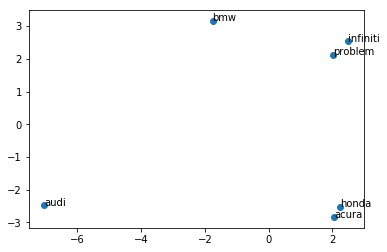

In [320]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds = MDS(n_components=2)
pos = mds.fit(dist_matrix).embedding_
fig, ax = plt.subplots()
ax.scatter(pos[:, 0], pos[:, 1])
for i in range(len(dist_pivot.index.values)):
    ax.annotate(dist_pivot.index.values[i], (pos[:, 0][i], pos[:, 1][i]))

In [ ]:
#list = []
#list = [i for e in brand for i in text_18.split() if e in i]
#for b in brand:
#    for c in list:
#        if re.search(b , c):
#            list = [word.replace(c,b) for word in list]
#set(list)